# Onion Peeling - Outlier Detection

In [1]:
import sys
import numpy as np
sys.path.append('../')
from mycode.onionPeeling import OnionPeeling
from mycode.utils import makePoints, drawPoints, drawHull

In [2]:
def onionPeelingOutlierDetection(S, k, draw=True, cor='green'):
    A = OnionPeeling(S)
    L, hull = A.outlierDetection(k, distance_metric='mahalanobis', convex_hull='gift-wrapping')
    if draw:
        print('Drawing points ...')
        drawPoints(S, cor='skyblue')
        drawHull(hull, cor=cor)
        drawPoints(L, cor='red')
    return L

In [3]:
n = 200
k = 10
np.random.seed(54)
points = makePoints(n)

Drawing points ...


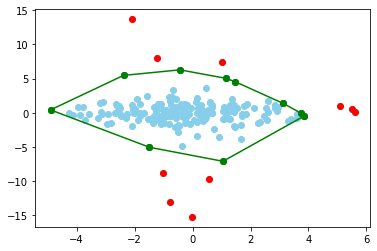

In [4]:
L = onionPeelingOutlierDetection(points, k)

## Data-set Wine

In [5]:
import os
import pandas as pd
from IPython.display import display, HTML
import skgeom as sg
from skgeom.draw import draw

In [7]:
wine_data = '../dataset/wine/wine.data'
if os.path.exists(wine_data) is False: print('File WINE.DATA not exist.')

In [8]:
names = ['label','Alcohol', 'Malic acid']
df = pd.read_csv(wine_data, usecols=[0,1,2], names=names, header=None)
display(df.head(5))

,label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [9]:
wine_points = list(zip(df[names[1]].to_list(), df[names[2]].to_list()))
labels = df[names[0]].to_list()

In [10]:
def draw_clusters(labels, points_clus):
    # Sabiendo que solo hay tres clases de vinos
    cor = ['orange', 'skyblue', 'gray']
    for idx, label in enumerate(labels):
        x, y = points_clus[idx]
        draw(sg.Point2(x, y), color=cor[label-1])

Drawing points ...
CPU times: user 2.1 s, sys: 0 ns, total: 2.1 s
Wall time: 2.09 s


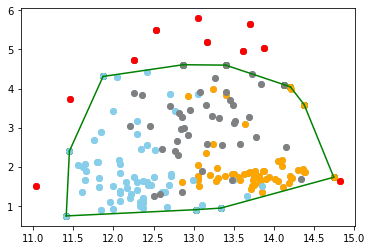

In [13]:
L = onionPeelingOutlierDetection(wine_points, k=10)
draw_clusters(labels, wine_points)
drawPoints(L, cor='red')

## Comparação com os métodos MCD (Minimum Covariance Determinant) e OCMSVD (One-class SVM)

In [33]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine

/root/miniconda3/envs/geocomp/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'label'
/root/miniconda3/envs/geocomp/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'label'
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


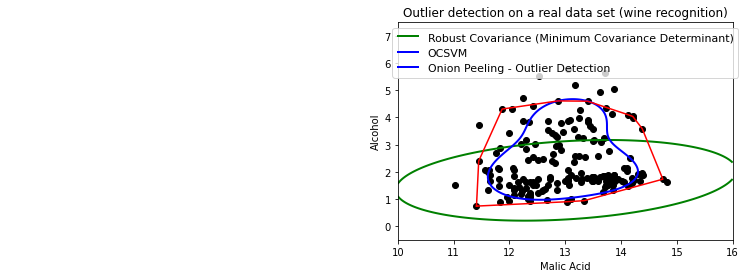

In [68]:
# Define "classifiers" to be used
classifiers = {
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35)}
colors = ['g', 'b']
legend1 = {}
legend2 = {}

# Get data
X1 = np.array(wine_points)  # two clusters

# Usando Onion-Peeling Outlier Detectyion
A = OnionPeeling(wine_points)
L, hull = A.outlierDetection(k=10, distance_metric='mahalanobis', convex_hull='gift-wrapping')
op_x = [x_ for x_, y_ in hull]
op_y = [y_ for x_, y_ in hull]
op_x.append(op_x[0])
op_y.append(op_y[0])

plt.plot(op_x, op_y, 'r-', label='Onion Peeling - Outlier Detection')

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(10, 16, 500), np.linspace(-0.5,7.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i], label=clf_name)

    
legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("outlying points", xy=(4, 2),
             xycoords="data", textcoords="data",
             xytext=(3, 1.25), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))

#plt.legend(loc='best')
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[1].collections[0]
           ),
           (legend1_keys_list[0], legend1_keys_list[1], 'Onion Peeling - Outlier Detection'),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel("Alcohol")
plt.xlabel("Malic Acid")

plt.savefig('./outlier_detection.eps', format='eps', dpi=300)
plt.show()

In [66]:
# A linha vermelha representa o algoritmo de  Onion Peeling - Outlier Detection, 
# aqui, neste gráfico, não consegui colocar uma legenda com a respectiva cor (vermelho)